#1.Initialization

##1.1.import libraries

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import ModelCheckpoint , ReduceLROnPlateau
from tensorflow.python.keras.layers.legacy_rnn.rnn_cell_impl import BasicLSTMCell
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , LSTM , Bidirectional , BatchNormalization, GRU, Embedding
from sklearn.metrics import mean_squared_error, median_absolute_error,mean_absolute_percentage_error,r2_score
import math

##1.2. Functions

In [ ]:
def evaluation(model,model_name,history,Xtrain,Xtest):



  print('=================================================================')
  print(f'------------------------------{model_name}--------------------------------')
  print('=================================================================')
  model.summary()
  Predictions = Target_Scaler.inverse_transform( model.predict(Xtest))
  Actual = Target_Scaler.inverse_transform(Ytest)
  Predictions = np.squeeze(Predictions , axis = 1)
  Actual = np.squeeze(Actual , axis = 1)
  print('=================================================================')
  print('--------')
  print('METRICS')
  print('--------')
  Metrics(model,model_name,Actual, Predictions)
  print('=================================================================')

  plt.rcParams["figure.figsize"] = (40,8)
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.suptitle('Learning Curve')

  ax1.plot(history.history['mae'])
  ax1.plot(history.history['val_mae'])
  ax1.set_title('model MAE')
  ax1.set_ylabel('MAE')
  ax1.set_xlabel('epoch')
  ax1.legend(['Train', 'Validation'], loc='upper left')

  ax2.plot(history.history['loss'])
  ax2.plot(history.history['val_loss'])
  ax2.set_title('model MSE')
  ax2.set_ylabel('MSE')
  ax2.set_xlabel('epoch')
  ax2.legend(['Train', 'Validation'], loc='upper left')

  fig = go.Figure()
  fig.add_trace(go.Scatter(x = data.index[-test_length:] , y = Actual , mode = 'lines' , name='Actual'))
  fig.add_trace(go.Scatter(x = data.index[-test_length:] , y = Predictions , mode = 'lines' , name=f'Predicted_by_{model_name}'))
  fig.update_layout(
      title={
        'text': f'Evaluating {model_name} model perfomance in the Test set',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
  fig.show()
  Total_features = np.concatenate((Xtrain , Xtest) , axis = 0)
  Total_Targets = np.concatenate((Ytrain , Ytest) , axis = 0)
  total_Predictions = model.predict(Total_features)
  total_Predictions = Target_Scaler.inverse_transform(total_Predictions)
  total_Actual = Target_Scaler.inverse_transform(Total_Targets)
  total_Predictions = np.squeeze(total_Predictions , axis = 1)
  total_Actual = np.squeeze(total_Actual , axis = 1)
  fig = go.Figure()
  fig.add_trace(go.Scatter(x = data.index , y = total_Actual , mode = 'lines' , name='Actual'))
  fig.add_trace(go.Scatter(x = data.index , y = total_Predictions , mode = 'lines' , name=f'Predicted_by_{model_name}'))
  fig.update_layout(
    title={
        'text': f'Evaluating {model_name} model perfomance in the entire Dataset',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
  fig.show()


In [ ]:
def Metrics(model,model_name,y_test, prediction):
  rmse = math.sqrt(mean_squared_error(y_test, prediction))
  mse=mean_squared_error(y_test, prediction)
  mae=median_absolute_error(y_test, prediction)
  mape=mean_absolute_percentage_error(y_test, prediction)
  r2=r2_score(y_test, prediction)
  result=pd.DataFrame({'model':model_name,'R2':r2,'rmse':rmse,'mse':mse,'mae':mae,'mape':mape},index=[0])
  display(result)
  return result

#2.forming dataset

##2.1. Reading Dataset

In [ ]:
data = yf.download("BTC-USD" , start = "2014-10-01",  interval = '1d')
#data = yf.download("^GSPC" , start = "2014-10-01",  interval = '1d')
#data = yf.download("^AMX" , start = "2014-10-01",  interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-01 00:00:00+00:00,387.427002,391.378998,380.779999,383.614990,383.614990,26229400
2014-10-02 00:00:00+00:00,383.988007,385.497009,372.946014,375.071991,375.071991,21777700
2014-10-03 00:00:00+00:00,375.181000,377.695007,357.859009,359.511993,359.511993,30901200


In [ ]:
# Sort the data points based on indexes just for confirmation 
data.sort_index(inplace = True)

In [ ]:
# Remove any duplicate index 
data = data.loc[~data.index.duplicated(keep='first')]

In [ ]:
data.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-29 00:00:00+00:00,23031.449219,23919.890625,22985.070312,23774.566406,23774.566406,27423687259
2023-01-30 00:00:00+00:00,23774.648438,23789.347656,22657.582031,22840.138672,22840.138672,27205595568
2023-02-01 00:00:00+00:00,23148.871094,23166.132812,22976.876953,23084.839844,23084.839844,22385307648


In [ ]:
data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-01 00:00:00+00:00,387.427002,391.378998,380.779999,383.614990,383.614990,26229400
2014-10-02 00:00:00+00:00,383.988007,385.497009,372.946014,375.071991,375.071991,21777700
2014-10-03 00:00:00+00:00,375.181000,377.695007,357.859009,359.511993,359.511993,30901200


In [ ]:
# Check for missing values 
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##2.2. EDA

In [ ]:
# Get the statistics of the data
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3.045000e+03
mean,12988.845688,13315.299371,12626.136173,12994.644832,12994.644832,1.647923e+10
std,16140.989476,16553.603058,15664.474659,16136.813957,16136.813957,1.991272e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,704.968018,715.718018,697.739014,705.020996,705.020996,1.103980e+08
50%,7238.141113,7388.302734,7081.379883,7243.134277,7243.134277,7.909820e+09
75%,17128.894531,17567.699219,16812.369141,17130.486328,17130.486328,2.801172e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


Understanding Trends with in the Data

In [ ]:
import plotly.graph_objects as go

In [ ]:
# Check the trend in Closing Values 
fig = go.Figure()

fig.add_trace(go.Scatter(x = data.index , y = data['Close'] , mode = 'lines'))
fig.update_layout(height = 500 , width = 900, 
                  xaxis_title='Date' , yaxis_title='Close')
fig.show()

In [ ]:
# Check the trend in Volume Traded
fig = go.Figure()

fig.add_trace(go.Scatter(x = data.index , y = data['Volume'] , mode = 'lines'))
fig.update_layout(height = 500 , width = 900, 
                  xaxis_title='Date' , yaxis_title='Volume')
fig.show()

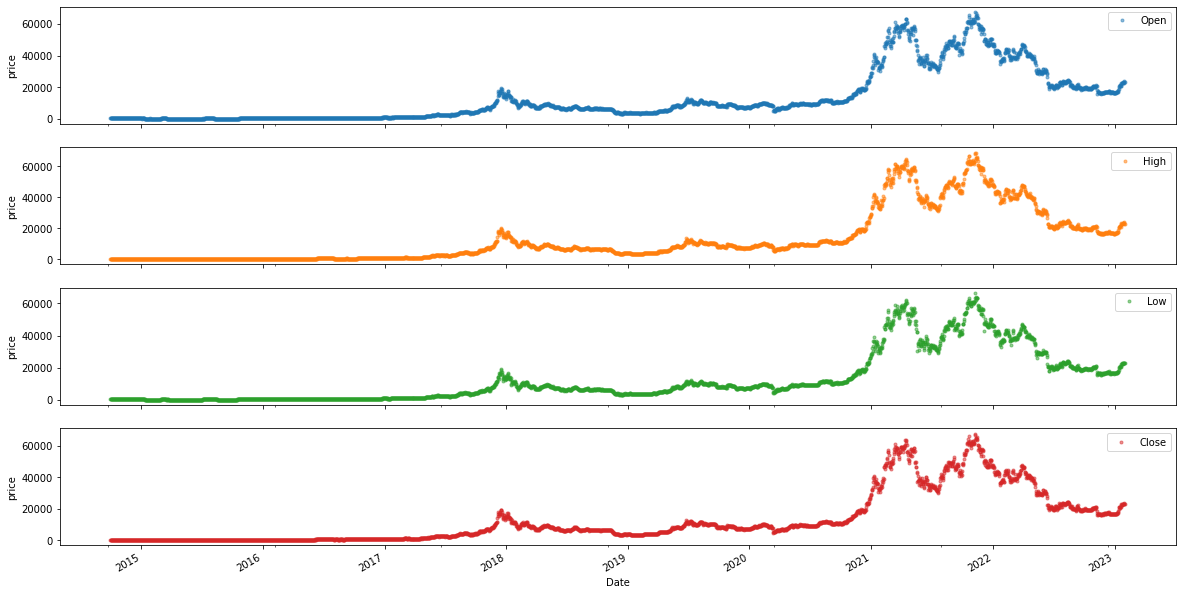

In [ ]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 11), subplots=True)
for ax in axes:
    ax.set_ylabel('price')

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3045.000000,3045.000000,3045.000000,3045.000000,3045.000000,3.045000e+03
mean,12988.845688,13315.299371,12626.136173,12994.644832,12994.644832,1.647923e+10
std,16140.989476,16553.603058,15664.474659,16136.813957,16136.813957,1.991272e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,704.968018,715.718018,697.739014,705.020996,705.020996,1.103980e+08
50%,7238.141113,7388.302734,7081.379883,7243.134277,7243.134277,7.909820e+09
75%,17128.894531,17567.699219,16812.369141,17130.486328,17130.486328,2.801172e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


Text(0, 0.5, 'Closing price')

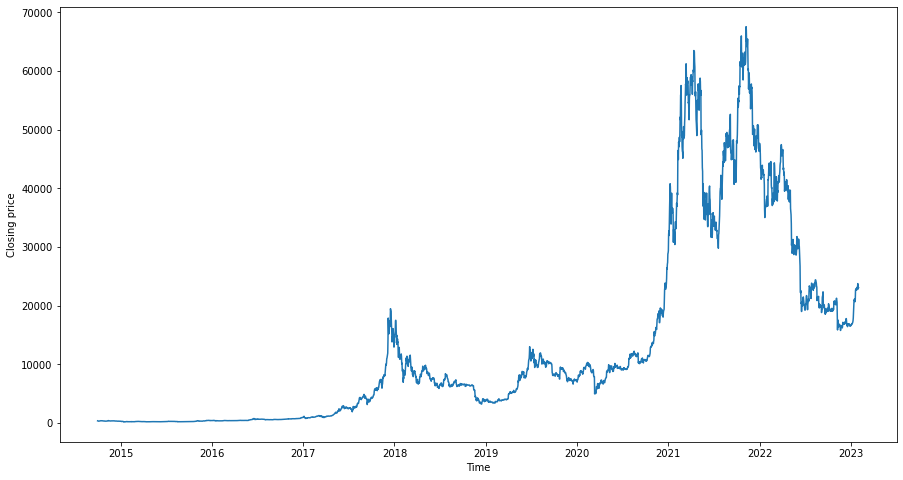

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(data['Close'], label="Close price")
plt.xlabel("Time")
plt.ylabel("Closing price")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/di

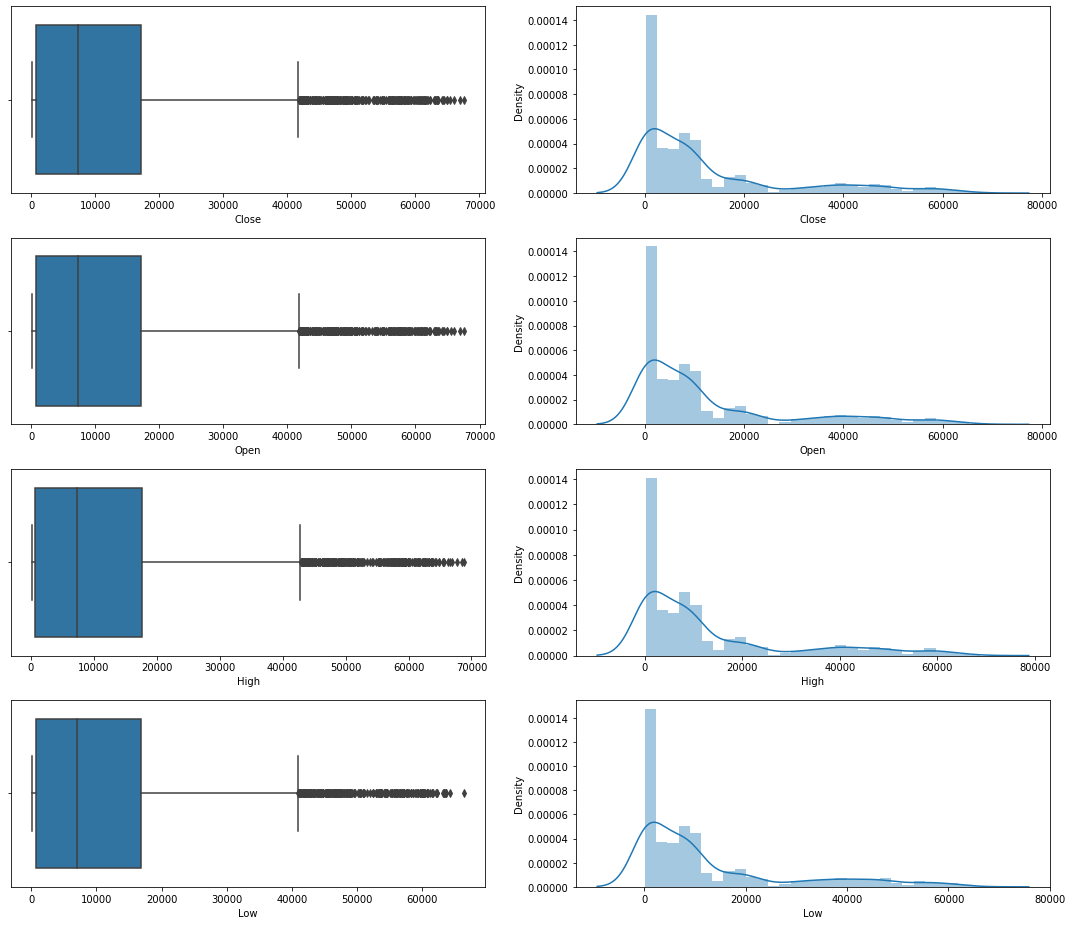

In [ ]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= data["Close"], ax = ax[0,0])
sns.distplot(data['Close'], ax = ax[0,1])
sns.boxplot(x= data["Open"], ax = ax[1,0])
sns.distplot(data['Open'], ax = ax[1,1])
sns.boxplot(x= data["High"], ax = ax[2,0])
sns.distplot(data['High'], ax = ax[2,1])
sns.boxplot(x= data["Low"], ax = ax[3,0])
sns.distplot(data['Low'], ax = ax[3,1])
plt.tight_layout()

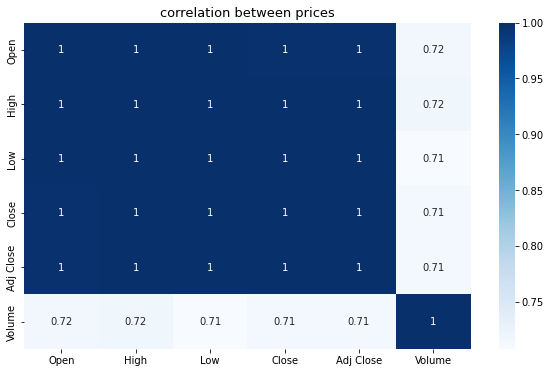

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap=plt.cm.Blues,annot=True)
plt.title('correlation between prices',
         fontsize=13)
plt.show()

##2.3.Data Preparation

In [ ]:
from sklearn.preprocessing import MinMaxScaler 
import pickle 
from tqdm.notebook import tnrange

In [ ]:
# Filter only required data 
data = data[['Close' , 'Volume']]
data.head(3)

,Close,Volume
Date,,
2014-10-01 00:00:00+00:00,383.614990,26229400
2014-10-02 00:00:00+00:00,375.071991,21777700
2014-10-03 00:00:00+00:00,359.511993,30901200


Scrapping extra information

In [ ]:
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
ext = '0.4.0-oneiric1_amd64.deb -qO'
!wget $url/libta-lib0_$ext libta.deb
!wget $url/ta-lib0-dev_$ext ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib
import talib


(Reading database ... 129525 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.9.1-1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.9) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = data

df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)
df['RSI_14'] = df['RSI_14'].replace(np.nan, 50)
df.isna().sum()

Close     0
Volume    0
RSI_14    0
dtype: int64

In [ ]:
df.head()

,Close,Volume,RSI_14
Date,,,
2014-10-01 00:00:00+00:00,383.614990,26229400,50.0
2014-10-02 00:00:00+00:00,375.071991,21777700,50.0
2014-10-03 00:00:00+00:00,359.511993,30901200,50.0
2014-10-04 00:00:00+00:00,328.865997,47236500,50.0
2014-10-05 00:00:00+00:00,320.510010,83308096,50.0


In [ ]:
rsi_data = df['RSI_14']
rsi_data.columns = ['Date', 'RSI']

In [ ]:
rsi_data.head()

Date
2014-10-01 00:00:00+00:00    50.0
2014-10-02 00:00:00+00:00    50.0
2014-10-03 00:00:00+00:00    50.0
2014-10-04 00:00:00+00:00    50.0
2014-10-05 00:00:00+00:00    50.0
Name: RSI_14, dtype: float64

In [ ]:
rsi_data = rsi_data[rsi_data.index >= '2014-10-01']

In [ ]:
#rsi_data['RSI'] = rsi_data['RSI'].astype(np.float64)
rsi_data = rsi_data.astype(np.float64)

In [ ]:
rsi_data.head()

Date
2014-10-01 00:00:00+00:00    50.0
2014-10-02 00:00:00+00:00    50.0
2014-10-03 00:00:00+00:00    50.0
2014-10-04 00:00:00+00:00    50.0
2014-10-05 00:00:00+00:00    50.0
Name: RSI_14, dtype: float64

In [ ]:
data = data.merge(rsi_data, left_index=True, right_index=True, how='inner')

In [ ]:
data.head()

,Close,Volume,RSI_14_x,RSI_14_y
Date,,,,
2014-10-01 00:00:00+00:00,383.614990,26229400,50.0,50.0
2014-10-02 00:00:00+00:00,375.071991,21777700,50.0,50.0
2014-10-03 00:00:00+00:00,359.511993,30901200,50.0,50.0
2014-10-04 00:00:00+00:00,328.865997,47236500,50.0,50.0
2014-10-05 00:00:00+00:00,320.510010,83308096,50.0,50.0


In [ ]:
data = data[['Close' , 'Volume', 'RSI_14_x']]
data.head()


,Close,Volume,RSI_14_x
Date,,,
2014-10-01 00:00:00+00:00,383.614990,26229400,50.0
2014-10-02 00:00:00+00:00,375.071991,21777700,50.0
2014-10-03 00:00:00+00:00,359.511993,30901200,50.0
2014-10-04 00:00:00+00:00,328.865997,47236500,50.0
2014-10-05 00:00:00+00:00,320.510010,83308096,50.0


In [ ]:
# Confirm the Testing Set length 
test_length = data[(data.index >= '2022-03-01')].shape[0]

In [ ]:
def CreateFeatures_and_Targets(data, feature_length):
    X = []
    Y = []

    for i in tnrange(len(data) - feature_length): 
        X.append(data.iloc[i : i + feature_length,:].values)
        Y.append(data["Close"].values[i+feature_length])

    X = np.array(X)
    Y = np.array(Y)

    return X , Y

In [ ]:
X , Y = CreateFeatures_and_Targets(data , 32)

  0%|          | 0/3013 [00:00<?, ?it/s]

In [ ]:
# Check the shapes
X.shape , Y.shape

((3013, 32, 3), (3013,))

In [ ]:
Xtrain , Xtest , Ytrain , Ytest = X[:-test_length] , X[-test_length:] , Y[:-test_length] , Y[-test_length:]

In [ ]:
# Check Training Dataset Shape 
Xtrain.shape , Ytrain.shape

((2676, 32, 3), (2676,))

In [ ]:
# Check Testing Dataset Shape
Xtest.shape , Ytest.shape

((337, 32, 3), (337,))

In [ ]:
# Create a Scaler to Scale Vectors with Multiple Dimensions 
class MultiDimensionScaler():
    def __init__(self):
        self.scalers = []

    def fit_transform(self , X):
        total_dims = X.shape[2]
        for i in range(total_dims):
            Scaler = MinMaxScaler()
            X[:, :, i] = Scaler.fit_transform(X[:,:,i])
            self.scalers.append(Scaler)
        return X

    def transform(self , X):
        for i in range(X.shape[2]):
            X[:, :, i] = self.scalers[i].transform(X[:,:,i])
        return X 

In [ ]:
Feature_Scaler = MultiDimensionScaler()
Xtrain = Feature_Scaler.fit_transform(Xtrain)
Xtest = Feature_Scaler.transform(Xtest)

In [ ]:
Target_Scaler = MinMaxScaler()
Ytrain = Target_Scaler.fit_transform(Ytrain.reshape(-1,1))
Ytest = Target_Scaler.transform(Ytest.reshape(-1,1))

In [ ]:
Xtrain.shape

(2676, 32, 3)

In [ ]:
def save_object(obj , name : str):
    pickle_out = open(f"{name}.pck","wb")
    pickle.dump(obj, pickle_out)
    pickle_out.close()

def load_object(name : str):
    pickle_in = open(f"{name}.pck","rb")
    data = pickle.load(pickle_in)
    return data

In [ ]:
# Save your objects for future purposes 
save_object(Feature_Scaler , "Feature_Scaler")
save_object(Target_Scaler , "Target_Scaler")

#3.modeling

##3.1. GRU

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint , ReduceLROnPlateau

save_best = ModelCheckpoint("GRU_best_weights.h5", monitor='val_loss', save_best_only=True, save_weights_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.25,patience=5, min_lr=0.00001,verbose = 1)

In [ ]:
GRU_model = Sequential()
GRU_model.add(GRU(64, activation='tanh',recurrent_activation='sigmoid',recurrent_dropout=0.0, unroll = False,use_bias=True,
              reset_after = True))
GRU_model.add(Dropout(0.3))
GRU_model.add(Dense(64 , activation='elu'))
GRU_model.add(Dropout(0.3))
GRU_model.add(Dense(32 , activation='elu'))
GRU_model.add(Dense(1 , activation='linear'))

In [ ]:
from tensorflow.python import metrics
#optimizer = tf.keras.optimizers.SGD(learning_rate = 0.002)
#model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
GRU_model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

##3.2. LSTM

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='tanh',recurrent_activation='sigmoid',recurrent_dropout=0.0, unroll = False,use_bias=True,
                   ))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(64 , activation='elu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(32 , activation='elu'))
model_lstm.add(Dense(1 , activation='linear'))
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model_lstm.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

##3.3. CNN

In [ ]:
from tensorflow.keras.layers import MaxPooling1D, Flatten,GlobalAveragePooling1D,Conv1D
from tensorflow.keras.optimizers import Adam
lr = 0.001
save_best = ModelCheckpoint("cnn_best_weights.h5", monitor='val_loss', save_best_only=True, save_weights_only=True)
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dropout(0.3))
model_cnn.add(Dense(50 , activation='elu'))
model_cnn.add(Dense(1 , activation='linear'))

# model_cnn.add(Dense(50, activation='relu'))
# model_cnn.add(Dense(1))
model_cnn.compile(loss='mse', optimizer=Adam(lr), metrics=['mae'])

##3.4. CNN_GRU

In [ ]:
X_train_series_sub = Xtrain.reshape((Xtrain.shape[0], 32, 3, 1))
X_valid_series_sub = Xtest.reshape((Xtest.shape[0], 32, 3, 1))
print('Train set shape', X_train_series_sub.shape)
print('Validation set shape', X_valid_series_sub.shape)

Train set shape (2676, 32, 3, 1)
Validation set shape (337, 32, 3, 1)


In [ ]:
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed,Conv1D,RepeatVector,Reshape,Conv2D

model_cnn_gru = Sequential()
model_cnn_gru.add(Conv2D(128, (3, 3), input_shape=(None,Xtrain.shape[2], 1)))
model_cnn_gru.add(Dropout(0.2))
model_cnn_gru.add(Reshape(target_shape=(30, 128)))
model_cnn_gru.add(GRU(128, return_sequences=False))
model_cnn_gru.add(Dense(128, activation='relu'))
model_cnn_gru.add(Dense(1))
model_cnn_gru.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

##3.5.CNN_LSTM

In [ ]:
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed,Conv1D,RepeatVector,Reshape,Conv2D

model_cnn_lstm = Sequential()
model_cnn_lstm.add(Conv2D(128, (3, 3), input_shape=(None,Xtrain.shape[2], 1)))
# mod_cnn_lstmel.add(MaxPool2D(pool_size=(2, 2))) by imposing kernel_size_y to #features
model_cnn_lstm.add(Dropout(0.2))
model_cnn_lstm.add(Reshape(target_shape=(30, 128)))
model_cnn_lstm.add(LSTM(128, return_sequences=False))
model_cnn_lstm.add(Dense(128, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

#4.Models_Fitting

##4.1.GRU

In [ ]:
GRU_history = GRU_model.fit(Xtrain, Ytrain,
            epochs=100, 
            batch_size = 64,
            verbose=1,
            shuffle=False ,
            validation_data=(Xtest , Ytest),
            callbacks=[reduce_lr , save_best])
# Load the best weights


Epoch 1/100
42/42 [==============================] - 2s 15ms/step - loss: 0.0191 - mae: 0.0884 - val_loss: 0.0694 - val_mae: 0.2602 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0204 - mae: 0.1057 - val_loss: 5.6373e-04 - val_mae: 0.0190 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0033 - mae: 0.0369 - val_loss: 0.0022 - val_mae: 0.0437 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0037 - mae: 0.0375 - val_loss: 0.0073 - val_mae: 0.0840 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0370 - val_loss: 3.5736e-04 - val_mae: 0.0153 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 0s 5ms/step - loss: 0.0024 - mae: 0.0320 - val_loss: 7.9121e-04 - val_mae: 0.0241 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 0s 5ms/step - loss: 0.0018 - mae: 0.0261 - val_loss: 0.0014 - val_mae:

##4.2.LSTM

In [ ]:
LSTM_history = model_lstm.fit(Xtrain, Ytrain,
            epochs=100, 
            batch_size = 64,
            verbose=1,
            shuffle=False ,
            validation_data=(Xtest , Ytest),
            callbacks=[reduce_lr , save_best])

Epoch 1/100
42/42 [==============================] - 3s 15ms/step - loss: 0.0185 - mae: 0.0860 - val_loss: 0.0842 - val_mae: 0.2886 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0167 - mae: 0.0967 - val_loss: 0.0075 - val_mae: 0.0830 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0058 - mae: 0.0484 - val_loss: 0.0105 - val_mae: 0.0982 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 0s 5ms/step - loss: 0.0049 - mae: 0.0447 - val_loss: 0.0087 - val_mae: 0.0908 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0051 - mae: 0.0469 - val_loss: 0.0062 - val_mae: 0.0751 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 0s 5ms/step - loss: 0.0038 - mae: 0.0397 - val_loss: 0.0072 - val_mae: 0.0825 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0028 - mae: 0.0364 - val_loss: 9.7489e-04 - val_mae: 0.0271 

##4.3. CNN

In [ ]:
cnn_history = model_cnn.fit(Xtrain, Ytrain,
            epochs=100, 
            batch_size = 64,
            verbose=1,
            shuffle=False ,
            validation_data=(Xtest , Ytest),
            callbacks=[reduce_lr , save_best])

Epoch 1/100
42/42 [==============================] - 1s 8ms/step - loss: 0.0274 - mae: 0.1385 - val_loss: 0.0268 - val_mae: 0.1384 - lr: 0.0010
Epoch 2/100
42/42 [==============================] - 0s 5ms/step - loss: 0.0704 - mae: 0.1827 - val_loss: 0.0717 - val_mae: 0.2582 - lr: 0.0010
Epoch 3/100
42/42 [==============================] - 0s 5ms/step - loss: 0.0786 - mae: 0.1798 - val_loss: 0.0975 - val_mae: 0.3047 - lr: 0.0010
Epoch 4/100
42/42 [==============================] - 0s 7ms/step - loss: 0.0639 - mae: 0.1947 - val_loss: 0.0350 - val_mae: 0.1612 - lr: 0.0010
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0358 - mae: 0.1499 - val_loss: 0.0135 - val_mae: 0.1083 - lr: 0.0010
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 0.0097 - mae: 0.0782 - val_loss: 0.0103 - val_mae: 0.0903 - lr: 0.0010
Epoch 7/100
42/42 [==============================] - 0s 4ms/step - loss: 0.0065 - mae: 0.0647 - val_loss: 0.0057 - val_mae: 0.0649 - lr:

##4.3. CNN_GRU

In [ ]:
model_cnn_gru_history = model_cnn_gru.fit(X_train_series_sub, Ytrain,
            epochs=100, 
            batch_size = 64,
            verbose=1,
            shuffle=False ,
            validation_data=(X_valid_series_sub , Ytest))

Epoch 1/100
42/42 [==============================] - 0s 7ms/step - loss: 0.0039 - mae: 0.0332 - val_loss: 0.0226 - val_mae: 0.1466
Epoch 2/100
42/42 [==============================] - 0s 7ms/step - loss: 0.0069 - mae: 0.0516 - val_loss: 0.0740 - val_mae: 0.2587
Epoch 3/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0043 - mae: 0.0437 - val_loss: 6.0461e-04 - val_mae: 0.0213
Epoch 4/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0326 - val_loss: 2.8384e-04 - val_mae: 0.0121
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0018 - mae: 0.0330 - val_loss: 4.5454e-04 - val_mae: 0.0181
Epoch 6/100
42/42 [==============================] - 0s 7ms/step - loss: 0.0015 - mae: 0.0312 - val_loss: 3.0985e-04 - val_mae: 0.0135
Epoch 7/100
42/42 [==============================] - 0s 6ms/step - loss: 0.0016 - mae: 0.0327 - val_loss: 7.6704e-04 - val_mae: 0.0238
Epoch 8/100
42/42 [==============================] - 0s 6ms/ste

##4.4. CNN-LSTM

In [ ]:
X_train_series_sub = Xtrain.reshape((Xtrain.shape[0], 32, 3, 1))
X_valid_series_sub = Xtest.reshape((Xtest.shape[0], 32, 3, 1))

cnn_lstm_history = model_cnn_lstm.fit(X_train_series_sub, Ytrain,
            epochs=100, 
            batch_size = 32,
            verbose=1,
            shuffle=False ,
            validation_data=(X_valid_series_sub , Ytest))

Epoch 1/100
84/84 [==============================] - 3s 11ms/step - loss: 0.0059 - mae: 0.0471 - val_loss: 0.0197 - val_mae: 0.1281
Epoch 2/100
84/84 [==============================] - 0s 6ms/step - loss: 0.0178 - mae: 0.0707 - val_loss: 0.0320 - val_mae: 0.1652
Epoch 3/100
84/84 [==============================] - 0s 6ms/step - loss: 0.0203 - mae: 0.0855 - val_loss: 0.0568 - val_mae: 0.2201
Epoch 4/100
84/84 [==============================] - 1s 6ms/step - loss: 0.0266 - mae: 0.0889 - val_loss: 0.1593 - val_mae: 0.3824
Epoch 5/100
84/84 [==============================] - 0s 6ms/step - loss: 0.0293 - mae: 0.0952 - val_loss: 0.0646 - val_mae: 0.2347
Epoch 6/100
84/84 [==============================] - 1s 6ms/step - loss: 0.0243 - mae: 0.0982 - val_loss: 0.0568 - val_mae: 0.2076
Epoch 7/100
84/84 [==============================] - 1s 6ms/step - loss: 0.0343 - mae: 0.1086 - val_loss: 0.0941 - val_mae: 0.2798
Epoch 8/100
84/84 [==============================] - 1s 6ms/step - loss: 0.0229 - 

In [ ]:
Xtrain.shape

(2676, 32, 3)

#5.Result

##5.1GRU

------------------------------GRU--------------------------------
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 64)                13248     
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_38 (Dense)            (None, 64)                4160      
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_39 (Dense)            (None, 32)                2080      
                                                                 
 dense_40 (Dense)            (None, 1)                 33        
                                                     

,model,R2,rmse,mse,mae,mape
0,GRU,0.979419,1282.51583,1.644847e+06,831.292969,0.042659


95/95 [==============================] - 0s 2ms/step


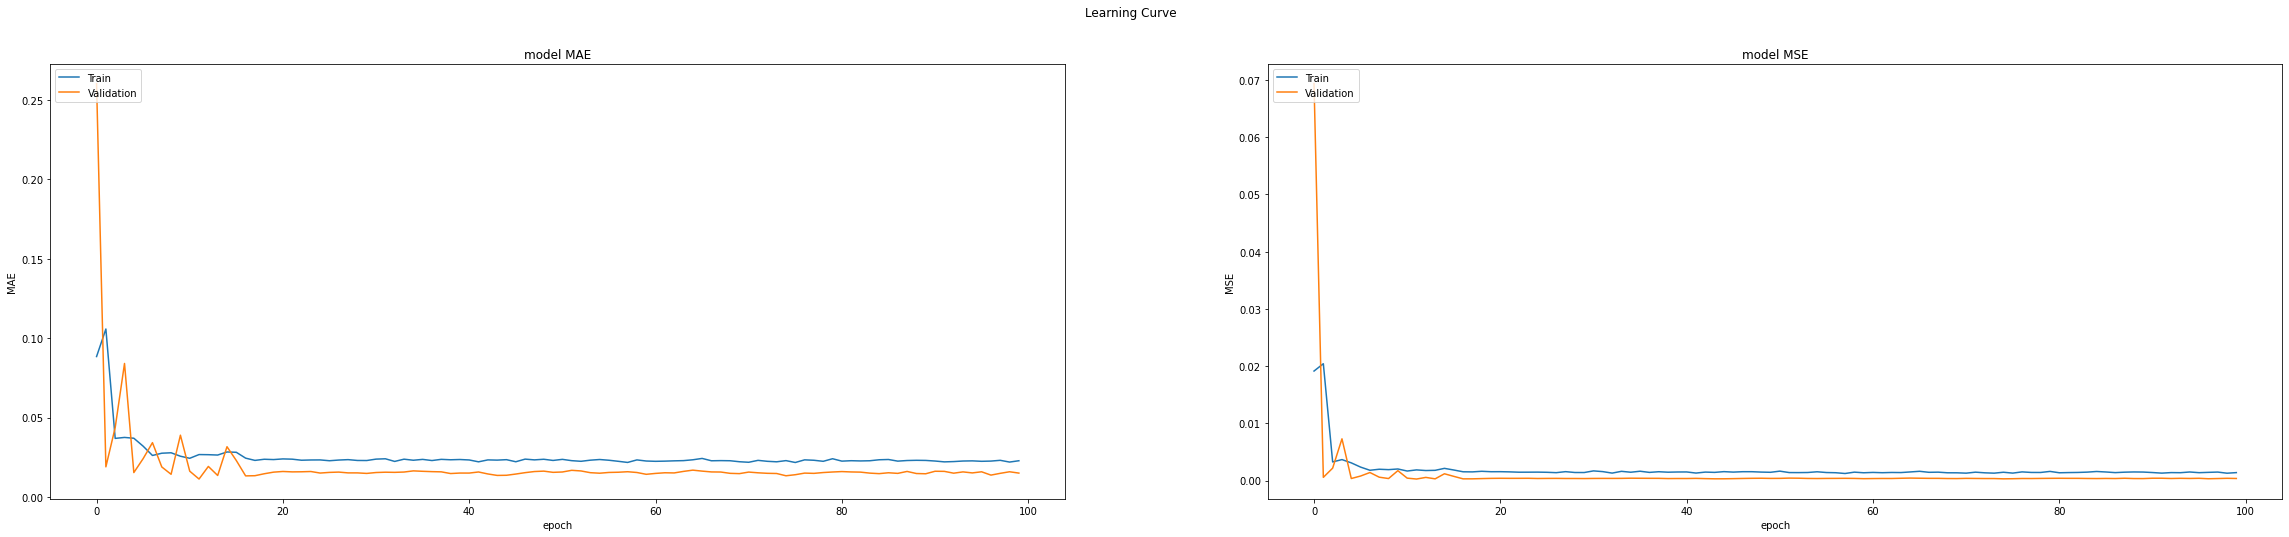

In [ ]:
evaluation(GRU_model,'GRU',GRU_history,Xtrain,Xtest)

##5.2.LSTM

------------------------------LSTM--------------------------------
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 64)                17408     
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_48 (Dense)            (None, 64)                4160      
                                                                 
 dropout_30 (Dropout)        (None, 64)                0         
                                                                 
 dense_49 (Dense)            (None, 32)                2080      
                                                                 
 dense_50 (Dense)            (None, 1)                 33        
                                                    

,model,R2,rmse,mse,mae,mape
0,LSTM,0.972652,1478.400651,2.185668e+06,890.431641,0.04672


95/95 [==============================] - 0s 2ms/step


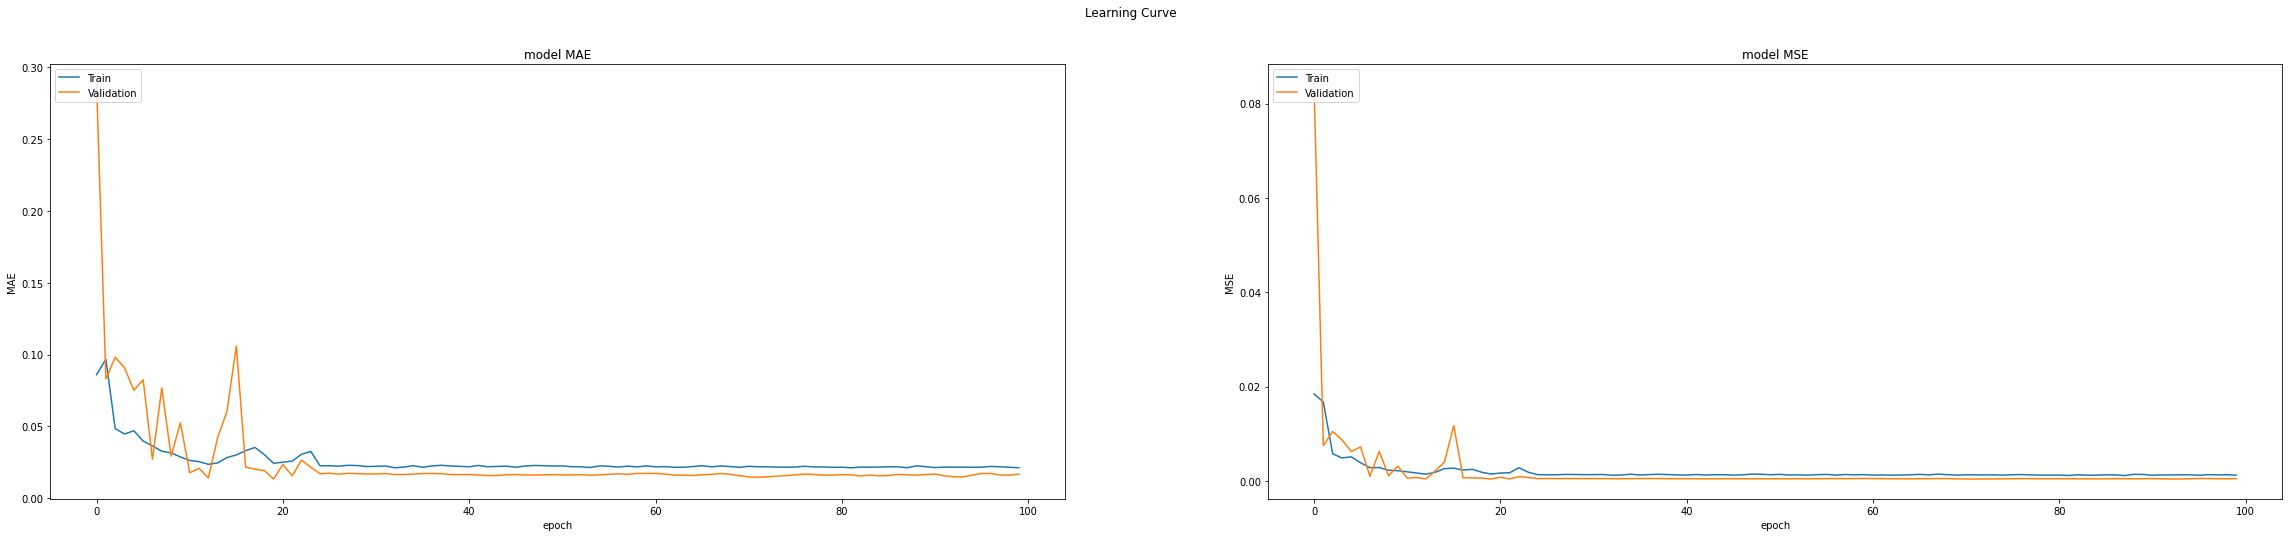

In [ ]:
evaluation(model_lstm,'LSTM',LSTM_history,Xtrain,Xtest)

##5.3.CNN

------------------------------cnn--------------------------------
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 31, 128)           896       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 15, 128)          0         
 1D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1920)              0         
                                                                 
 dropout_28 (Dropout)        (None, 1920)              0         
                                                                 
 dense_46 (Dense)            (None, 50)                96050     
                                                                 
 dense_47 (Dense)            (None, 1)               

,model,R2,rmse,mse,mae,mape
0,cnn,0.957423,1844.651286,3.402738e+06,958.957031,0.054855


95/95 [==============================] - 0s 2ms/step


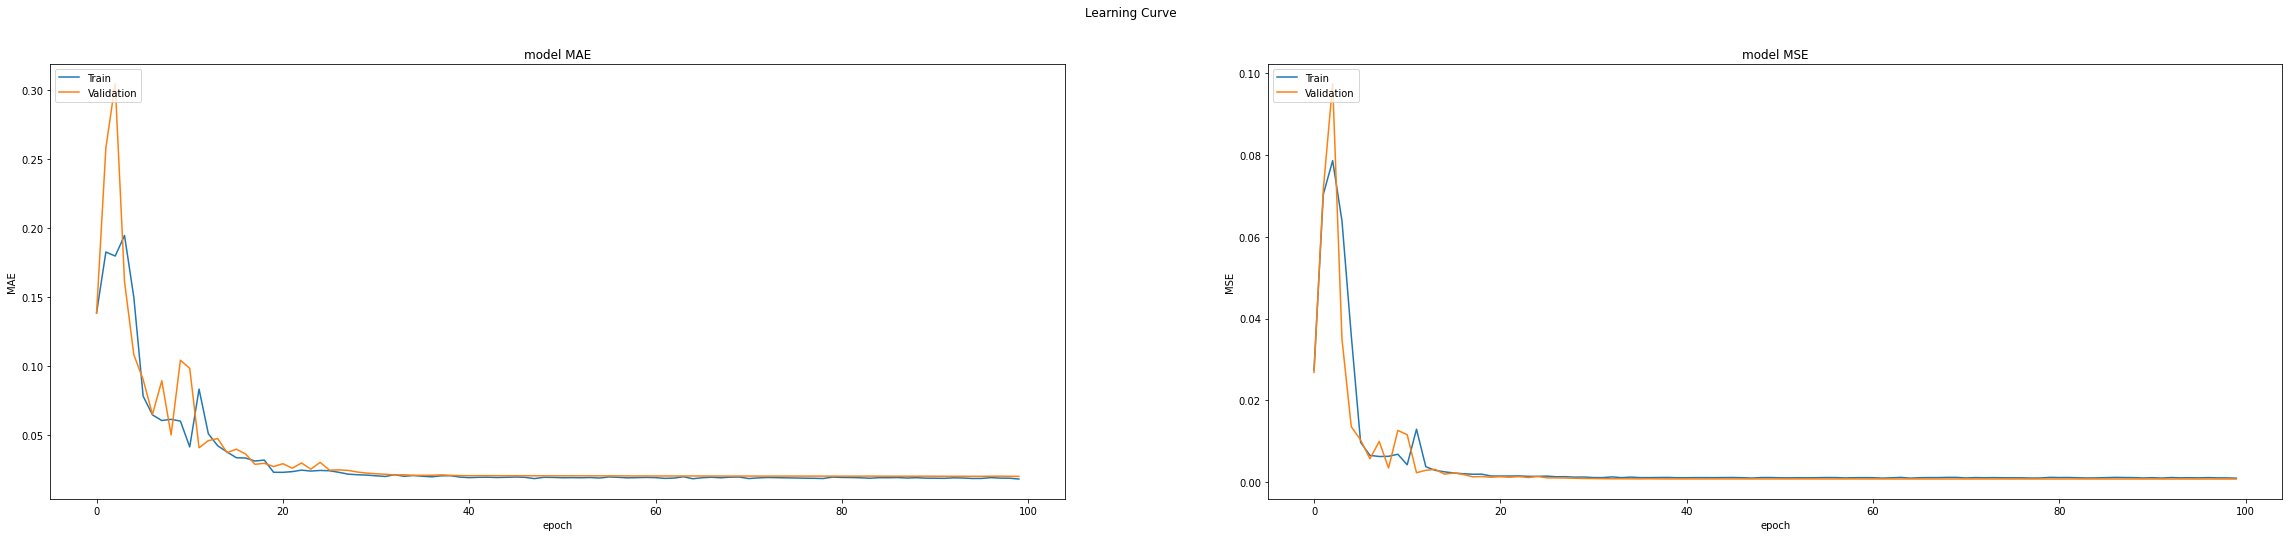

In [ ]:
evaluation(model_cnn,'cnn',cnn_history,Xtrain,Xtest)

##5.4. CNN_GRU

------------------------------CNN_GRU--------------------------------
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, None, 1, 128)      1280      
                                                                 
 dropout_59 (Dropout)        (None, None, 1, 128)      0         
                                                                 
 reshape_22 (Reshape)        (None, 30, 128)           0         
                                                                 
 gru_11 (GRU)                (None, 128)               99072     
                                                                 
 dense_98 (Dense)            (None, 128)               16512     
                                                                 
 dense_99 (Dense)            (None, 1)                 129       
                                                 

,model,R2,rmse,mse,mae,mape
0,CNN_GRU,0.979463,1281.14312,1.641328e+06,707.988281,0.038342


95/95 [==============================] - 0s 2ms/step


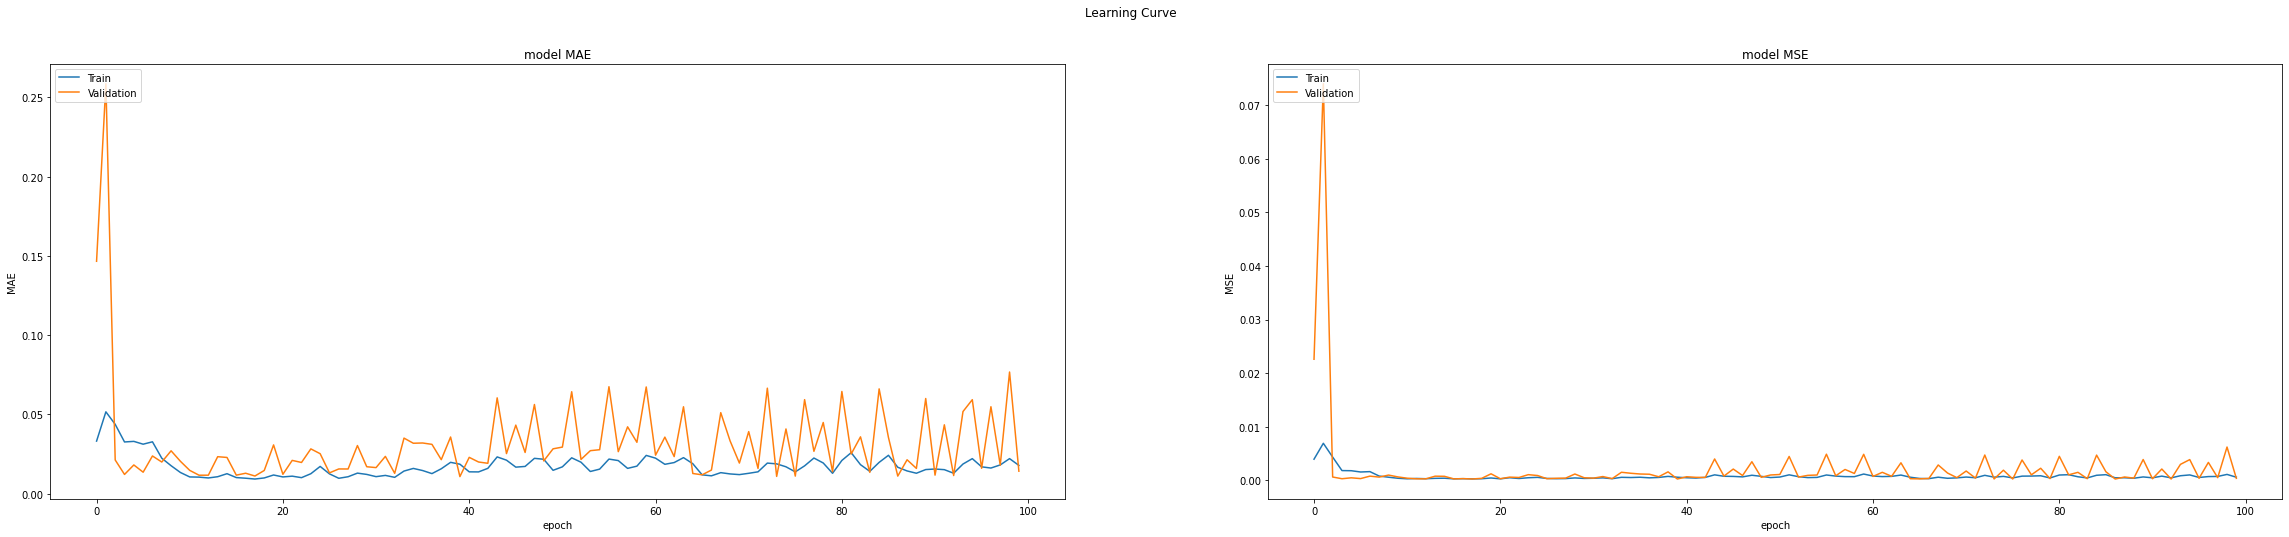

In [ ]:
evaluation(model_cnn_gru,'CNN_GRU',model_cnn_gru_history,Xtrain,Xtest)

##5.5. CNN_LSTM

------------------------------CNN_LSTM--------------------------------
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, None, 1, 128)      1280      
                                                                 
 dropout_51 (Dropout)        (None, None, 1, 128)      0         
                                                                 
 reshape_14 (Reshape)        (None, 30, 128)           0         
                                                                 
 lstm_25 (LSTM)              (None, 128)               131584    
                                                                 
 dense_82 (Dense)            (None, 128)               16512     
                                                                 
 dense_83 (Dense)            (None, 1)                 129       
                                                

,model,R2,rmse,mse,mae,mape
0,CNN_LSTM,0.981662,1210.603943,1.465562e+06,614.886719,0.034629


95/95 [==============================] - 0s 3ms/step


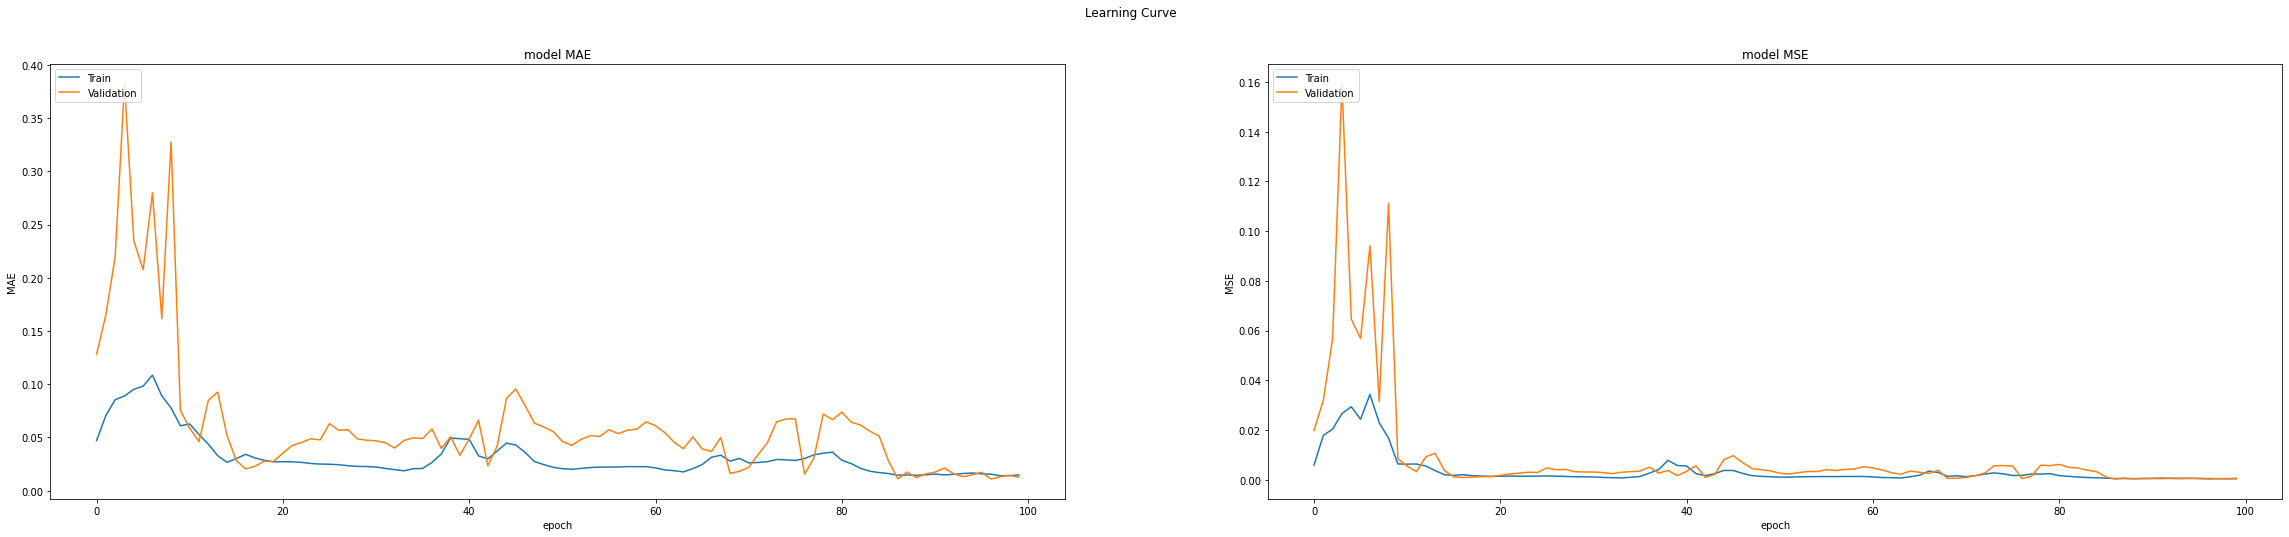

In [ ]:
evaluation(model_cnn_lstm,'CNN_LSTM',cnn_lstm_history,X_train_series_sub,X_valid_series_sub)

#6.Comparison Model 

In [ ]:
metric=pd.DataFrame()
Actual = Target_Scaler.inverse_transform(Ytest)
Actual = np.squeeze(Actual , axis = 1)

Predictions = Target_Scaler.inverse_transform( GRU_model.predict(Xtest))
gru_Predictions = np.squeeze(Predictions , axis = 1)
gru=Metrics(GRU_model,'GRU',Actual, gru_Predictions)
Predictions = Target_Scaler.inverse_transform( model_lstm.predict(Xtest))
lstm_Predictions = np.squeeze(Predictions , axis = 1)
LSTM=Metrics(model_lstm,'LSTM',Actual, lstm_Predictions)
Predictions = Target_Scaler.inverse_transform( model_cnn.predict(Xtest))
cnn_Predictions = np.squeeze(Predictions , axis = 1)
CNN=Metrics(model_cnn,'CNN',Actual, cnn_Predictions)
X_train_series_sub = Xtrain.reshape((Xtrain.shape[0], 32, 3, 1))
X_valid_series_sub = Xtest.reshape((Xtest.shape[0], 32, 3, 1))
Predictions = Target_Scaler.inverse_transform( model_cnn_lstm.predict(X_valid_series_sub))
cnn_lstm_Predictions = np.squeeze(Predictions , axis = 1)
CNN_LSTM=Metrics(model_cnn_lstm,'CNN_LSTM',Actual, cnn_lstm_Predictions)
Predictions = Target_Scaler.inverse_transform( model_cnn_gru.predict(Xtest))
cnn_gru_Predictions = np.squeeze(Predictions , axis = 1)
CNN_GRU=Metrics(model_cnn_gru,'CNN_GRU',Actual, cnn_gru_Predictions)

metric=pd.concat([CNN,gru,LSTM,CNN_GRU,CNN_LSTM],axis=0)
metric

11/11 [==============================] - 0s 2ms/step


,model,R2,rmse,mse,mae,mape
0,GRU,0.979419,1282.51583,1.644847e+06,831.292969,0.042659


11/11 [==============================] - 0s 2ms/step


,model,R2,rmse,mse,mae,mape
0,LSTM,0.972652,1478.400651,2.185668e+06,890.431641,0.04672


11/11 [==============================] - 0s 2ms/step


,model,R2,rmse,mse,mae,mape
0,CNN,0.957423,1844.651286,3.402738e+06,958.957031,0.054855


11/11 [==============================] - 0s 4ms/step


,model,R2,rmse,mse,mae,mape
0,CNN_LSTM,0.981662,1210.603943,1.465562e+06,614.886719,0.034629


11/11 [==============================] - 0s 4ms/step


,model,R2,rmse,mse,mae,mape
0,CNN_GRU,0.979463,1281.14312,1.641328e+06,707.988281,0.038342


,model,R2,rmse,mse,mae,mape
0,CNN,0.957423,1844.651286,3.402738e+06,958.957031,0.054855
0,GRU,0.979419,1282.515830,1.644847e+06,831.292969,0.042659
0,LSTM,0.972652,1478.400651,2.185668e+06,890.431641,0.046720
0,CNN_GRU,0.979463,1281.143120,1.641328e+06,707.988281,0.038342
0,CNN_LSTM,0.981662,1210.603943,1.465562e+06,614.886719,0.034629


In [ ]:
metric.to_csv('drive/My Drive/k2 variable stars_ver1/metrics.csv')

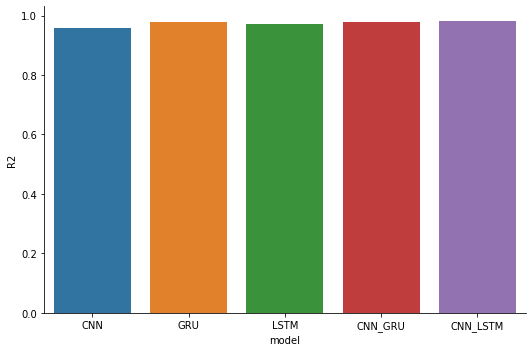

In [ ]:
p = sns.catplot(kind='bar', data=metric, x='model', y='R2', height=5, aspect=1.5)

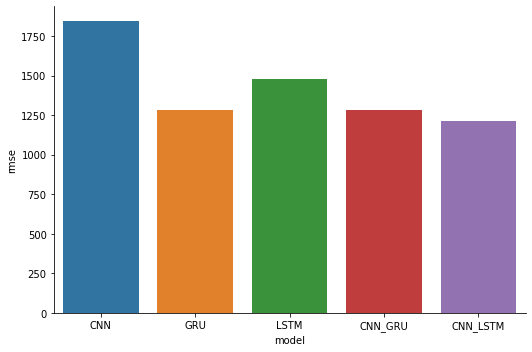

In [ ]:
p = sns.catplot(kind='bar', data=metric, x='model', y='rmse', height=5, aspect=1.5)

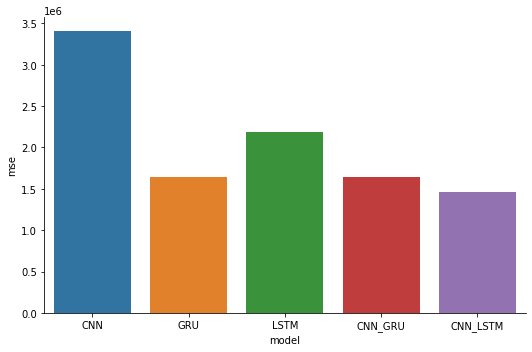

In [ ]:
p = sns.catplot(kind='bar', data=metric, x='model', y='mse', height=5, aspect=1.5)

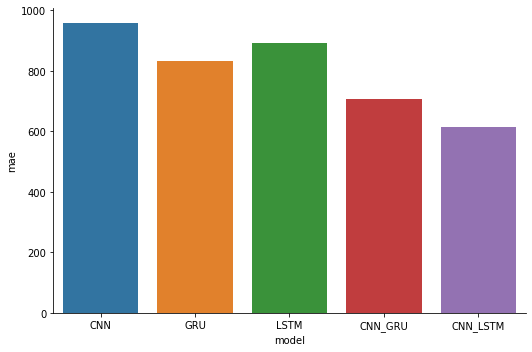

In [ ]:
p = sns.catplot(kind='bar', data=metric, x='model', y='mae', height=5, aspect=1.5)

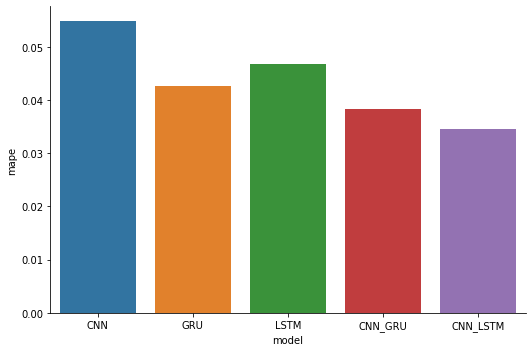

In [ ]:
p = sns.catplot(kind='bar', data=metric, x='model', y='mape', height=5, aspect=1.5)

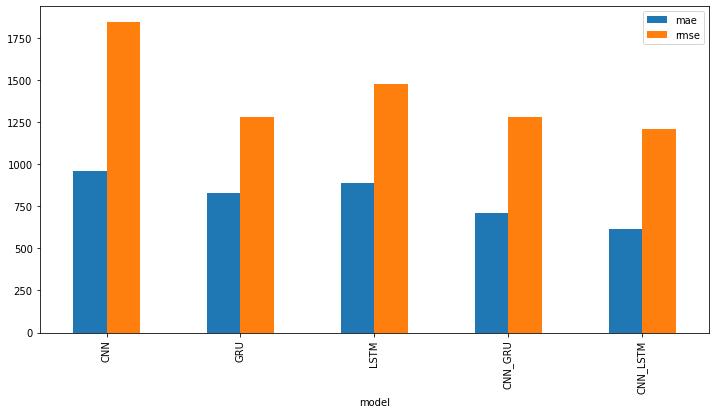

In [ ]:
ax = metric.plot.bar(x='model', y=['mae','rmse'],figsize=(12, 6) )

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data.index[-test_length:] , y = Actual , mode = 'lines' , name='Actual'))
fig.add_trace(go.Scatter(x = data.index[-test_length:] , y = gru_Predictions , mode = 'lines' , name='GRU'))
fig.add_trace(go.Scatter(x = data.index[-test_length:] , y = lstm_Predictions , mode = 'lines' , name='LSTM'))
fig.add_trace(go.Scatter(x = data.index[-test_length:] , y = cnn_Predictions , mode = 'lines' , name='CNN'))
fig.add_trace(go.Scatter(x = data.index[-test_length:] , y = cnn_lstm_Predictions , mode = 'lines' , name='CNN_LSTM'))
fig.add_trace(go.Scatter(x = data.index[-test_length:] , y = cnn_gru_Predictions , mode = 'lines' , name='CNN_GRU'))


  
fig.update_layout(
    title={
      'text': f'Evaluating different models perfomance in the Test set',
      'y':0.9,
      'x':0.5,
      'xanchor': 'center',
      'yanchor': 'top'})
fig.show()

#7.save models

In [ ]:
# Save and Load the whole model
# model.save("Model.h5")
# loaded_model = tf.keras.models.load_model("Model.h5")

#8.Realtime Prediction

In [ ]:
def PredictStockPrice(Model , DataFrame , PreviousDate , feature_length = 32):
    idx_location = DataFrame.index.get_loc(PreviousDate)
    Features = DataFrame.iloc[idx_location - feature_length : idx_location,:].values
    Features = np.expand_dims(Features , axis = 0)
    Features = Feature_Scaler.transform(Features)
    Prediction = Model.predict(Features)
    Prediction = Target_Scaler.inverse_transform(Prediction)
    return Prediction[0][0]

In [ ]:
print(Actual)

[  325.89199829   327.5539856    330.49200439 ... 23774.56640625
 22840.13867188 22866.79492188]


In [ ]:
PredictStockPrice(loaded_model , data , '2023-01-17')

1/1 [==============================] - 0s 282ms/step


21194.16

In [ ]:
floss, fmae = model.evaluate(Xtrain, Ytrain)
print('Loss = ','{0:.10f}'.format(floss))
print('MAE = ','{0:.10f}'.format(fmae))

84/84 [==============================] - 0s 3ms/step - loss: 5.1454e-04 - mae: 0.0199
Loss =  0.0005145390
MAE =  0.0199163463
